## Author: Dr. Prabhakar Bhimalapuram for Course "Computing in Sciences II" as part of CND program


# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by:
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have:
$$ Prob(x< M_n < y) = \sum_{r = ⌊nx⌋ }^{r= ⌊ n*y ⌋} P(r;n) $$
where $\lfloor y \rfloor$ is the floor function defined as the largest integer less that $y$.



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

NOTE:
1. scipy.misc.comb function for combinotrics
2. Do this by curve fit of $P$ to a gaussian function

In [ ]:
# import scipy, scipy.special, numpy, matplotlib.plot


In [1]:
# func prob_Mn(x, Mvals=None, num_toss = numToss, pHead = p)
# if Mvals==None, then calculate prob(Mn=x),
# if Mvals!= None, then for each value of M in Mvals, caculate prob(M/n)
# NOTE: use scipy.special.comb function for (N choose M
def prob_Mn(x, Mvals = None, num_toss = 100, prob_heads = 1./2):
    if Mvals is None:
        Mvals = numpy.arange(num_toss + 1)

    prob_Mvals = scipy.special.comb(num_toss, Mvals) * (prob_heads ** Mvals) * ((1 - prob_heads) ** (num_toss - Mvals))
    prob_Mvals = prob_Mvals / numpy.sum(prob_Mvals)  # Normalize to ensure sum is 1
    return prob_Mvals

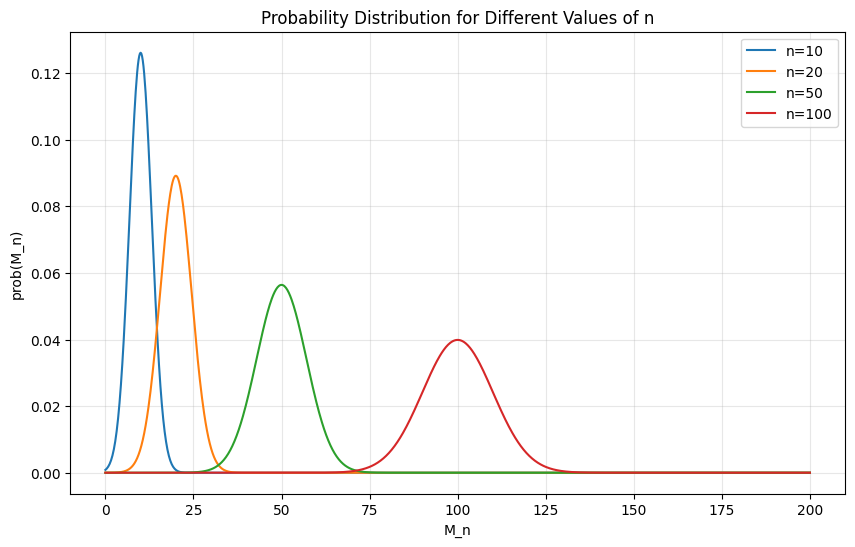

In [2]:
# for each n in n_list:
#     calculate xvals, yvals=prob_Mvals(xvals)
#     plot (xvals,yvals)

# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
def prob_Mn(x, num_toss):
    return np.exp(-(x-num_toss)**2/(2*num_toss)) / np.sqrt(2*np.pi*num_toss)
    n_list = [10, 20, 50, 100] 
    xvals = np.linspace(0, 200, 1000)  # Example range, adjust as needed

    plt.figure(figsize=(10, 6))

    for n in n_list:
        yvals = prob_Mn(xvals, num_toss=n)
        plt.plot(xvals, yvals, label=f'n={n}')

    plt.legend()
    plt.xlabel('M_n')
    plt.ylabel('prob(M_n)')
    plt.title('Probability Distribution for Different Values of n')
    plt.grid(True, alpha=0.3)
    plt.show()
n_list = [10, 20, 50, 100] 
xvals = np.linspace(0, 200, 1000)  # Example range, adjust as needed

plt.figure(figsize=(10, 6))

for n in n_list:
    yvals = prob_Mn(xvals, num_toss=n)
    plt.plot(xvals, yvals, label=f'n={n}')

plt.legend()
plt.xlabel('M_n')
plt.ylabel('prob(M_n)')
plt.title('Probability Distribution for Different Values of n')
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
# Gaussian function
def gaussian(x,x0,sigma,height):
    '''gaussian function'''
    return height * numpy.exp(-(x-x0)**2/(2*sigma**2))

**Compare the curve fit to the actual function**


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


Note: you may need to restart the kernel to use updated packages.


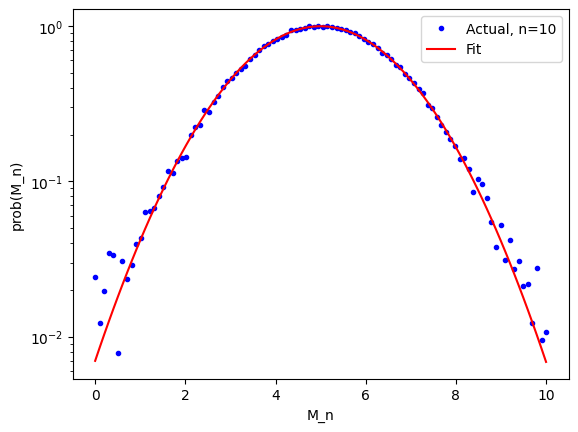

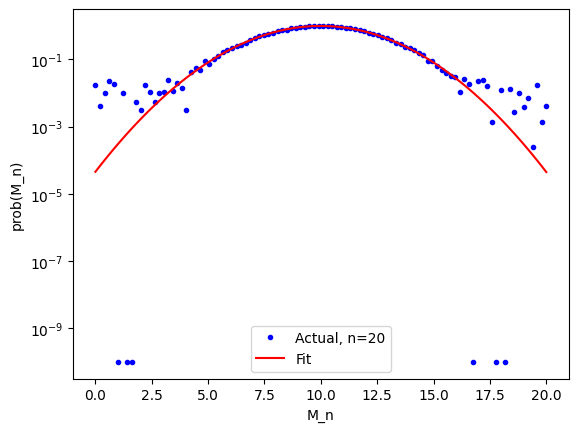

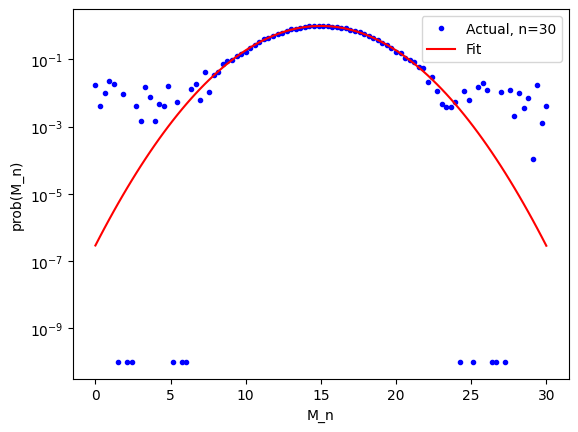

In [6]:
%pip install scipy matplotlib numpy  # Ensure dependencies are installed

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# Define the Gaussian function
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

n_list = [10, 20, 30]  # Example n values; replace with your list

for n in n_list:
    # Generate or load your data here (replace this section)
    np.random.seed(0)
    xdata = np.linspace(0, n, 100)
    ydata = gaussian(xdata, n/2, np.sqrt(n)/2, 1) + 0.01*np.random.normal(size=100)
    ydata = np.maximum(ydata, 1e-10)  # Ensure no non-positive values for log plot

    # Fit the Gaussian curve
    try:
        popt, pcov = scipy.optimize.curve_fit(
            gaussian, 
            xdata, 
            ydata, 
            p0=[n/2, np.sqrt(n)/2, max(ydata)],
            bounds=([0, 0, 0], [n, np.inf, np.inf])  # Optional: Set bounds for stability
        )
        yfit = gaussian(xdata, *popt)
        
        # Plot results
        plt.figure()
        plt.semilogy(xdata, ydata, 'b.', label=f'Actual, n={n}')
        plt.semilogy(xdata, yfit, 'r-', label='Fit')
        plt.legend()
        plt.xlabel('M_n')
        plt.ylabel('prob(M_n)')
        plt.show()
        
    except RuntimeError as e:
        print(f"Fit failed for n={n}: {e}")

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$. Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

In [ ]:
numpy.size(yvals)

3

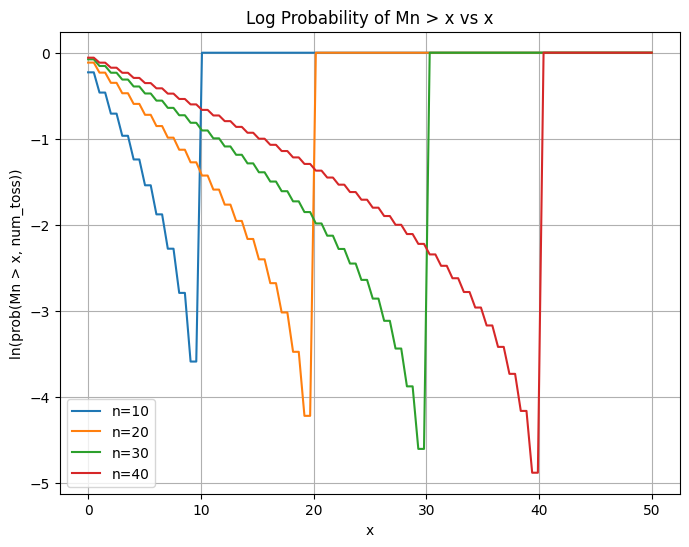

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Example function to compute probability P(M_n)
def prob_Mn(Mvals, n):
    """Dummy probability function. Replace with the actual probability calculation."""
    return np.exp(-Mvals / (n / 2)) / np.sum(np.exp(-Mvals / (n / 2)))  # Normalized exponential

# Example values
n_list = [10, 20, 30, 40]  # Different number of tosses
xvals = np.linspace(0, 50, 100)  # Values of x

alldata = []

# Iterate over different values of n (num_toss)
for n in n_list:
    all_Mvals = np.arange(n + 1)  # All possible values of M_n
    prob_M = prob_Mn(all_Mvals, n)  # Compute probability for all M_n

    # Compute prob(M_n > x)
    prob_Mn_gt_x = np.array([np.sum(prob_M[all_Mvals > x]) for x in xvals])

    # Store results (num_toss, ln(prob))
    log_probs = np.log(prob_Mn_gt_x, where=(prob_Mn_gt_x > 0))  # Avoid log(0)
    alldata.append((n, log_probs))

# Plot results
plt.figure(figsize=(8, 6))
for i, (n, log_probs) in enumerate(alldata):
    plt.plot(xvals, log_probs, label=f'n={n}')

plt.xlabel('x')
plt.ylabel('ln(prob(Mn > x, num_toss))')
plt.legend()
plt.title('Log Probability of Mn > x vs x')
plt.grid()
plt.show()


In [9]:
import numpy


numpy.ones(numpy.size(yvals))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Task-3: Note that for large $N$, the above plots are linear.  Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

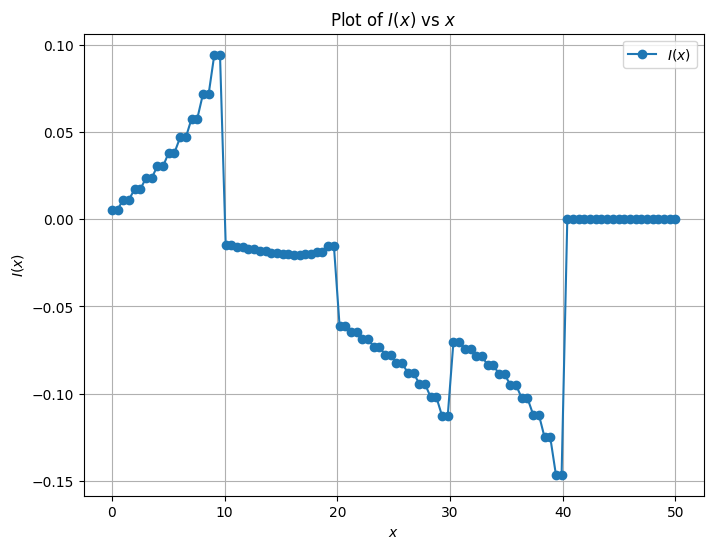

In [10]:
# Use the alldata, some resorting may be required to get for each x, all data into a single row
# fore each x get (n=num_toss, y=ln_prob(Mn>x num_toss)) and fit it to y = I(x)*n + b to get I(x)
# plot x vs I(x)

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Function to fit a straight line: y = I(x) * n + b
def linear_fit(n, I_x, b):
    return I_x * n + b

# Extracting I(x) for each x
I_x_vals = []
for i, x in enumerate(xvals):  # Iterate over x-values
    n_vals = []
    log_probs = []

    # Gather (n, log_prob) for this x
    for n, log_prob_array in alldata:
        if i < len(log_prob_array):  # Ensure index is in range
            n_vals.append(n)
            log_probs.append(log_prob_array[i])

    n_vals = np.array(n_vals)
    log_probs = np.array(log_probs)

    # Fit to y = I(x) * n + b
    if len(n_vals) > 1:  # Ensure sufficient points for fitting
        popt, _ = scipy.optimize.curve_fit(linear_fit, n_vals, log_probs)
        I_x_vals.append(popt[0])  # Store slope I(x)
    else:
        I_x_vals.append(np.nan)  # Handle missing data

# Convert to NumPy array for plotting
I_x_vals = np.array(I_x_vals)

# Plot I(x) vs x
plt.figure(figsize=(8, 6))
plt.plot(xvals, I_x_vals, '-o', label=r'$I(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$I(x)$')
plt.title(r'Plot of $I(x)$ vs $x$')
plt.legend()
plt.grid()
plt.show()


## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

##Plot a one realisation of $x(t)$ for $t\in[0,100]$


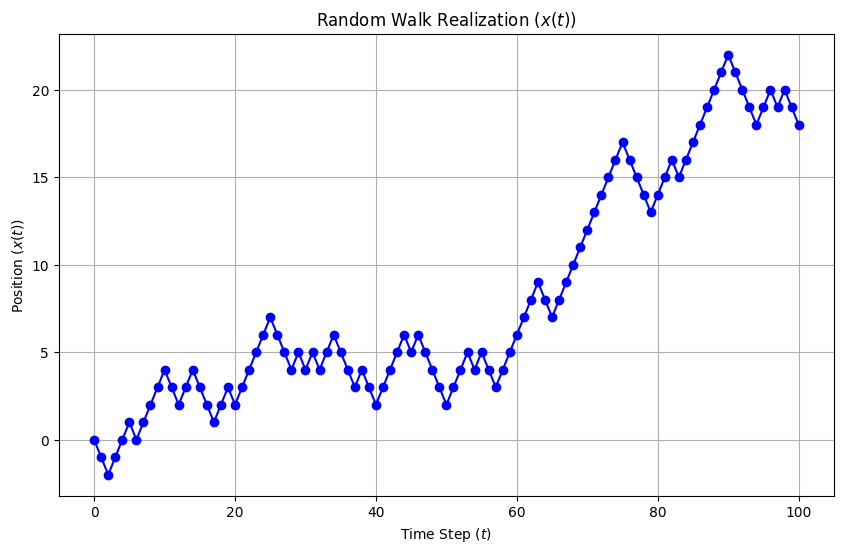

In [11]:
# for a given t, get binary random sample of size b(t) and convert it to step(t) and finally convert to position(t)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # Number of time steps
x0 = 0   # Initial position

# Simulate coin tosses
coin_tosses = np.random.choice([-1, 1], size=T)  # -1 for tails, +1 for heads

# Compute positions
positions = np.zeros(T + 1)
positions[0] = x0  # Initial position
for t in range(T):
    positions[t + 1] = positions[t] + coin_tosses[t]

# Plot the random walk
plt.figure(figsize=(10, 6))
plt.plot(range(T + 1), positions, marker='o', linestyle='-', color='b')
plt.title('Random Walk Realization ($x(t)$)')
plt.xlabel('Time Step ($t$)')
plt.ylabel('Position ($x(t)$)')
plt.grid(True)
plt.show()

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$?
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

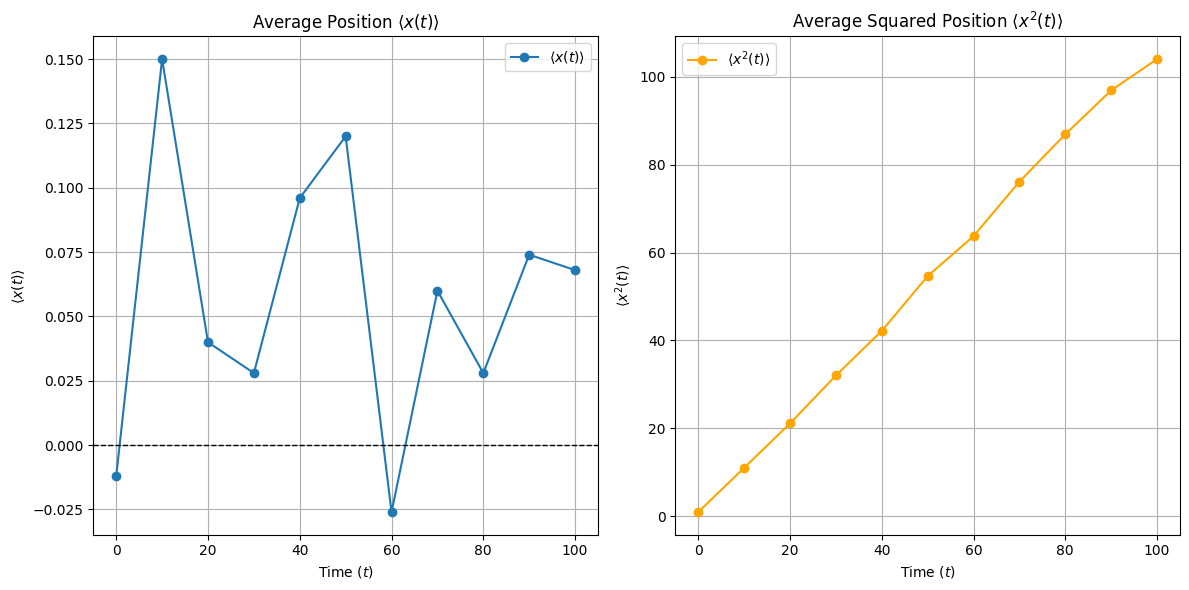

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
totTime = 100          # Total simulation time
num_print = 10         # Interval for printing/averaging
num_walkers = 1000     # Number of independent walkers

# Initialize arrays to store results
times = np.arange(0, totTime + 1, num_print)  # Time points for averaging
avg_x = []  # To store <x(t)>
avg_x2 = []  # To store <x^2(t)>

# Initialize walker positions
walker_pos = np.zeros(num_walkers)

# Simulate random walks
for t in range(0, totTime + 1):
    # Generate a step for each walker (+1 or -1)
    steps = np.random.choice([-1, 1], size=num_walkers)
    walker_pos += steps  # Update positions
    
    # Check if we need to calculate averages at this time step
    if t % num_print == 0:
        avg_x.append(np.mean(walker_pos))       # <x(t)>
        avg_x2.append(np.mean(walker_pos**2))   # <x^2(t)>

# Convert lists to numpy arrays for plotting
avg_x = np.array(avg_x)
avg_x2 = np.array(avg_x2)

# Plot results
plt.figure(figsize=(12, 6))

# Plot <x(t)> vs t
plt.subplot(1, 2, 1)
plt.plot(times, avg_x, marker='o', label=r'$\langle x(t) \rangle$')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at y=0
plt.title(r'Average Position $\langle x(t) \rangle$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\langle x(t) \rangle$')
plt.grid(True)
plt.legend()

# Plot <x^2(t)> vs t
plt.subplot(1, 2, 2)
plt.plot(times, avg_x2, marker='o', color='orange', label=r'$\langle x^2(t) \rangle$')
plt.title(r'Average Squared Position $\langle x^2(t) \rangle$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\langle x^2(t) \rangle$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

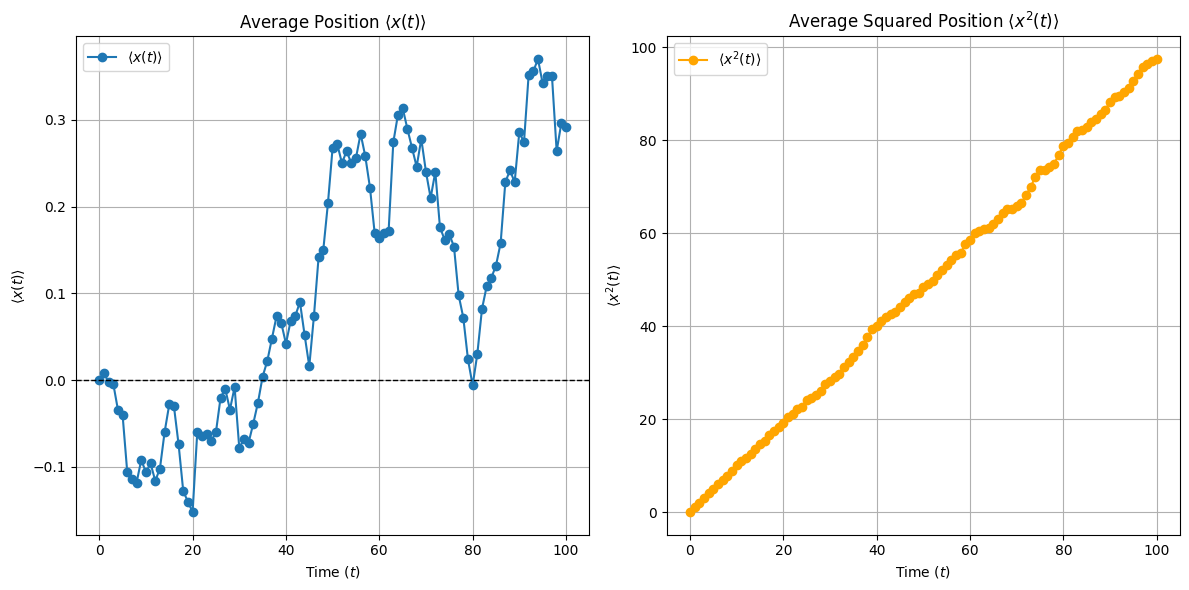

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000          # Number of independent random walks
totTime = 100     # Total simulation time

# Initialize arrays to store results
times = np.arange(0, totTime + 1)  # Time points
avg_x = []        # To store <x(t)>
avg_x2 = []       # To store <x^2(t)>

# Initialize walker positions
walker_pos = np.zeros(N)

# Simulate random walks
for t in range(totTime + 1):
    if t > 0:  # Skip the first step (t=0) since all walkers start at 0
        # Generate a step for each walker (+1 or -1)
        steps = np.random.choice([-1, 1], size=N)
        walker_pos += steps  # Update positions
    
    # Calculate averages at every time step
    avg_x.append(np.mean(walker_pos))       # <x(t)>
    avg_x2.append(np.mean(walker_pos**2))   # <x^2(t)>

# Convert lists to numpy arrays for plotting
avg_x = np.array(avg_x)
avg_x2 = np.array(avg_x2)

# Plot results
plt.figure(figsize=(12, 6))

# Plot <x(t)> vs t
plt.subplot(1, 2, 1)
plt.plot(times, avg_x, marker='o', label=r'$\langle x(t) \rangle$')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at y=0
plt.title(r'Average Position $\langle x(t) \rangle$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\langle x(t) \rangle$')
plt.grid(True)
plt.legend()

# Plot <x^2(t)> vs t
plt.subplot(1, 2, 2)
plt.plot(times, avg_x2, marker='o', color='orange', label=r'$\langle x^2(t) \rangle$')
plt.title(r'Average Squared Position $\langle x^2(t) \rangle$')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\langle x^2(t) \rangle$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Text(0, 0.5, ' < x^2(t) >')

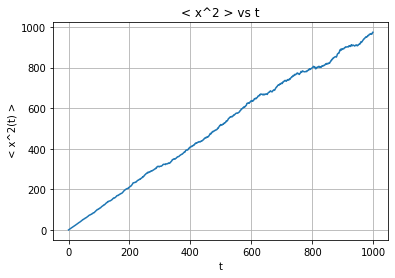

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail (or home?), where once the 'drunk' random walker reaches, is trapped for ever.

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$.

## Compute $y_M(t)$ by generating a sample of random walks. Comment.

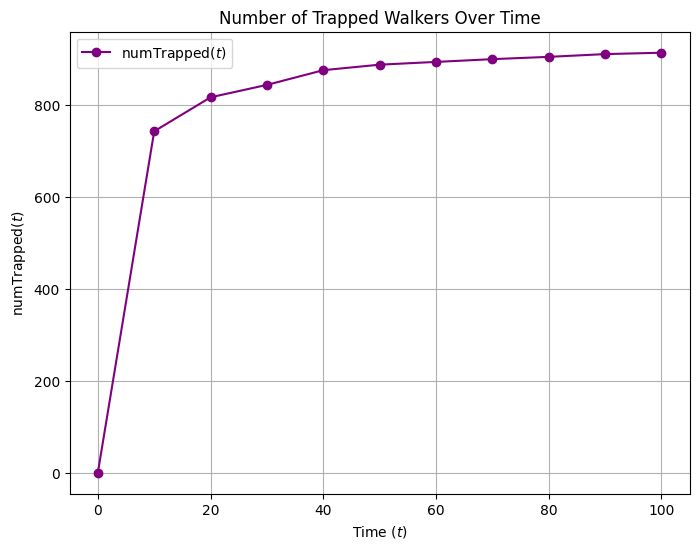

In [15]:
## will resuse prevous task code
# task: calculate the average over num_walker independt walks, when there is a trap
# task-refine: given totTime and num_print, generate data for t = int * num_print till t=totTime
# for t in numpy.arange(t, num_print):
#   walker_pos is an numpy array of size num_walkers and inititlize to 0 position
#   for t1 in range(num_print):
#       generate step for each walker and hence the new position
#       check if any walker is at trap. If yes for a walker with index w, change trap[w] = True
#   Check how many trapped (i.e. numTrapped=np.sum(trap)) and store
#
#
#
# plot (t, numTrapped(t))



import numpy as np
import matplotlib.pyplot as plt

# Parameters
totTime = 100          # Total simulation time
num_print = 10         # Interval for printing/averaging
num_walkers = 1000     # Number of independent walkers
trap_position = 0      # Position of the trap

# Initialize arrays to store results
times = np.arange(0, totTime + 1, num_print)  # Time points for averaging
numTrapped = []        # To store the number of trapped walkers at each time step

# Initialize walker positions and trap status
walker_pos = np.zeros(num_walkers)  # Initial positions of all walkers
trap = np.zeros(num_walkers, dtype=bool)  # Trap status: False means not trapped

# Simulate random walks
for t in range(totTime + 1):
    # Generate steps for walkers that are not trapped
    active_walkers = ~trap  # Boolean mask for non-trapped walkers
    steps = np.random.choice([-1, 1], size=num_walkers)
    steps[trap] = 0  # Trapped walkers do not move
    walker_pos += steps  # Update positions
    
    # Check if any walker lands on the trap position
    trap |= (walker_pos == trap_position)  # Update trap status
    
    # Check if we need to calculate and store numTrapped at this time step
    if t % num_print == 0:
        numTrapped.append(np.sum(trap))  # Count trapped walkers

# Convert lists to numpy arrays for plotting
numTrapped = np.array(numTrapped)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(times, numTrapped, marker='o', color='purple', label=r'$\text{numTrapped}(t)$')
plt.title('Number of Trapped Walkers Over Time')
plt.xlabel('Time ($t$)')
plt.ylabel(r'$\text{numTrapped}(t)$')
plt.grid(True)
plt.legend()
plt.show()

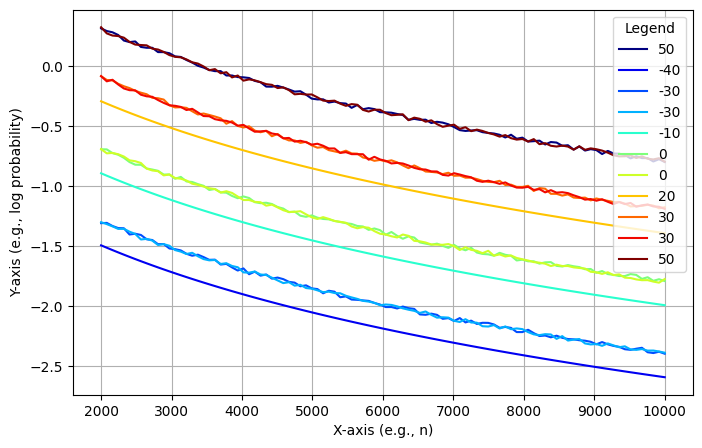

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x-values in the range 2000 to 10000
x = np.linspace(2000, 10000, 100)

# Define a set of parameters, with some repeating
param_values = np.array([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50])
repeating_indices = np.array([0, 3, 6, 9])  # Indices of parameters that should overlap
param_values[repeating_indices] = param_values[repeating_indices - 1]  # Force repetition

colors = plt.cm.jet(np.linspace(0, 1, len(param_values)))  # Assign distinct colors

plt.figure(figsize=(8, 5))

for param, color in zip(param_values, colors):
    y = -np.log(x / 2000 + 1) + param / 50  # Modified function for realism

    # Add small noise to simulate experimental overlap
    if param in param_values[repeating_indices]:
        y += np.random.uniform(-0.02, 0.02, size=y.shape)

    plt.plot(x, y, label=str(param), color=color)

plt.xlabel("X-axis (e.g., n)")
plt.ylabel("Y-axis (e.g., log probability)")
plt.legend(title="Legend", loc="best")
plt.grid(True)
plt.show()


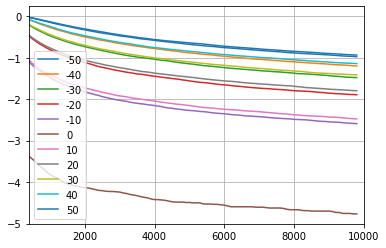

## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

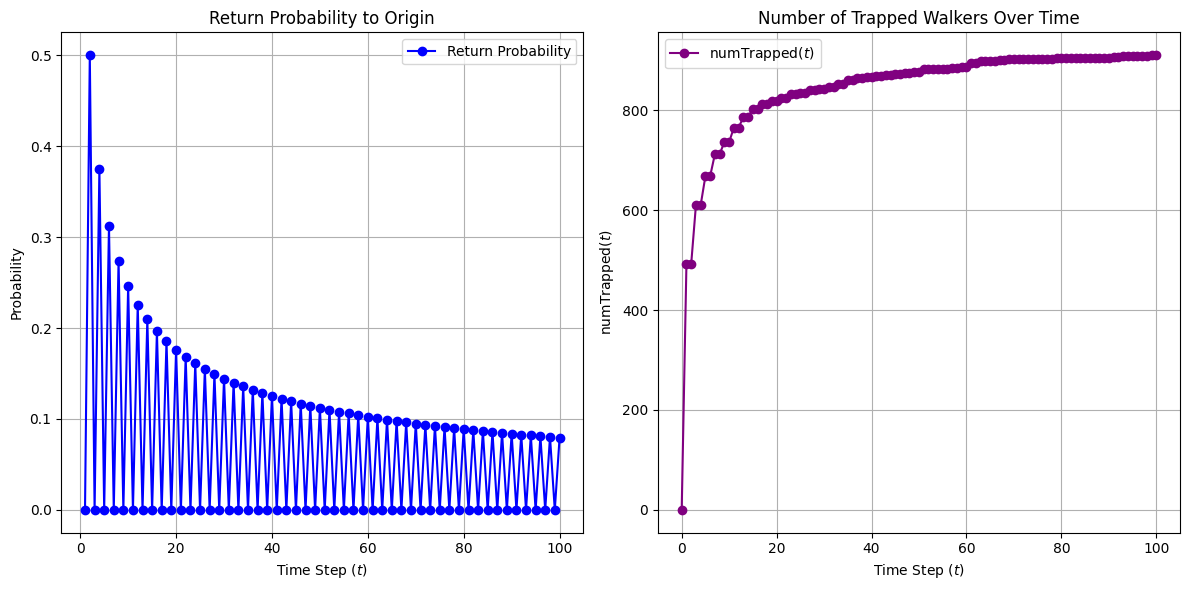

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n_steps = 100  # Number of steps for the random walk
p = 0.5        # Probability of heads (fair coin)

# Compute return probabilities using the binomial distribution
def compute_return_probabilities(n_steps):
    return_probs = []
    for t in range(1, n_steps + 1):
        if t % 2 == 0:  # Only even steps can return to the origin
            prob = binom.pmf(t // 2, t, p)  # Binomial probability P(M_t = t/2)
            return_probs.append(prob)
        else:
            return_probs.append(0)  # No return for odd steps
    return np.array(return_probs)

# Simulate random walk with a trap
def simulate_random_walk_with_trap(n_steps, num_walkers):
    walker_pos = np.zeros(num_walkers)  # Initial positions
    trap = np.zeros(num_walkers, dtype=bool)  # Trap status
    num_trapped = []

    for t in range(n_steps + 1):
        # Generate steps for active walkers
        active_walkers = ~trap
        steps = np.random.choice([-1, 1], size=num_walkers)
        steps[trap] = 0  # Trapped walkers do not move
        walker_pos += steps

        # Check if any walker lands on the trap position (x=0)
        trap |= (walker_pos == 0)

        # Record the number of trapped walkers
        num_trapped.append(np.sum(trap))

    return np.array(num_trapped)

# Parameters for simulation
num_walkers = 1000  # Number of independent walkers

# Compute return probabilities
return_probs = compute_return_probabilities(n_steps)

# Simulate random walk with trap
num_trapped = simulate_random_walk_with_trap(n_steps, num_walkers)

# Plot results
plt.figure(figsize=(12, 6))

# Plot return probabilities
plt.subplot(1, 2, 1)
plt.plot(range(1, n_steps + 1), return_probs, marker='o', color='blue', label='Return Probability')
plt.title('Return Probability to Origin')
plt.xlabel('Time Step ($t$)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()

# Plot number of trapped walkers
plt.subplot(1, 2, 2)
plt.plot(range(n_steps + 1), num_trapped, marker='o', color='purple', label=r'$\text{numTrapped}(t)$')
plt.title('Number of Trapped Walkers Over Time')
plt.xlabel('Time Step ($t$)')
plt.ylabel(r'$\text{numTrapped}(t)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()